## Problem 2: Verification

{}
Customer arrived at time 34.6054473334962   queue length 1
{70.78172777559809: 'departure'}
Customer arrived at time 40.666815045733685   queue length 2
{70.78172777559809: 'departure', 149.71709196245303: 'departure'}
Customer arrived at time 63.024299662131426   queue length 3
{149.71709196245303: 'departure', 73.50059477564717: 'arrival'}
Customer departed at time 70.78172777559809   queue length 2
{149.71709196245303: 'departure'}
Customer arrived at time 73.50059477564717   queue length 3
{149.71709196245303: 'departure'}
Customer arrived at time 116.82758982406276   queue length 4
{149.71709196245303: 'departure'}
Customer arrived at time 122.8333334989543   queue length 4
{202.96567351100774: 'arrival'}
Customer departed at time 149.71709196245303   queue length 3
{}
Customer arrived at time 202.96567351100774   queue length 4
{}
Customer arrived at time 210.34163715949262   queue length 4
{}
Customer arrived at time 229.25176541879136   queue length 4
{}
Customer arrived at 

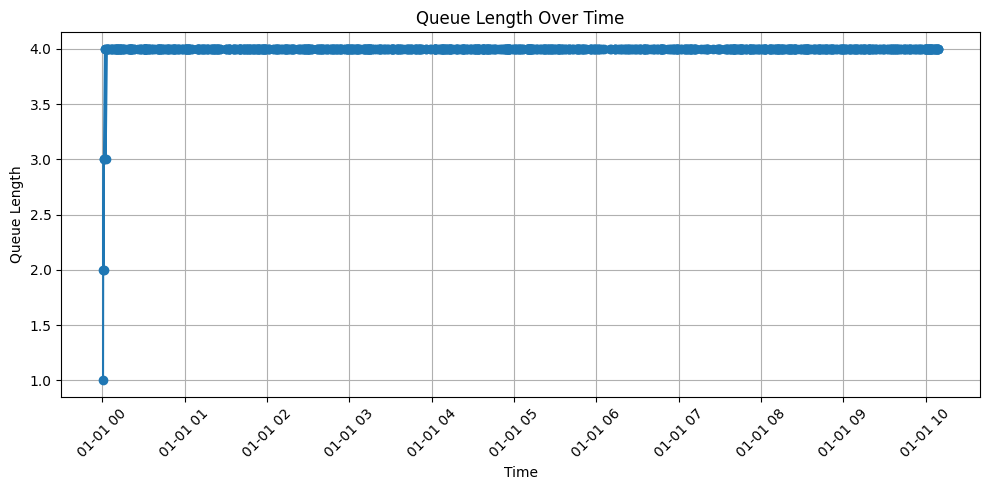

In [28]:
import numpy as np
import matplotlib.pyplot as plt 

lambda_ = 100 # customers per hour
mu = lambda_
mu_A = mu/3


# For A simulate M/M/2 queue with capacity 4
def simulate_A():
    """
    Event-driven simulation of M/M/2 queue with capacity 4
    """
    # Parameters
    num_customers = 1000
    arrival_rate = lambda_ / 3600  # customers per second
    service_rate = mu_A / 3600  # customers per second
    num_servers = 2
    queue_capacity = 4

    event_queue = {}
    ARR_EVENT = "arrival"
    DEP_EVENT = "departure"

    # Plan arrival of first customer
    event_queue[np.random.exponential(1 / arrival_rate)] = ARR_EVENT
    
    queue_length = 0
    arrived_customers = 0
    passed_events = {}
    queue_length_history = {}
    while arrived_customers < num_customers:
        # Get the next event
        event_time = min(event_queue.keys())
        event_type = event_queue.pop(event_time)
        passed_events[event_time] = event_type
        print(event_queue)

        if event_type == ARR_EVENT:
            arrived_customers += 1
            # Serve this customer if there is a free server

            if queue_length < queue_capacity:
                queue_length += 1
                # Schedule departure for this customer
                service_time = np.random.exponential(1 / service_rate)
                event_queue[event_time + service_time] = DEP_EVENT

            if queue_length <= num_servers:
                # Schedule departure for this customer
                service_time = np.random.exponential(1 / service_rate)
                event_queue[event_time + service_time] = DEP_EVENT
            
    return passed_events, queue_length_history

    


import pandas as pd

passed_events, queue_length_history = simulate_A()
queue_length_df = pd.DataFrame.from_dict(queue_length_history, orient='index', columns=['Queue Length'])
queue_length_df.index = pd.to_datetime(queue_length_df.index, unit='s')
# Plot the queue length over time
plt.figure(figsize=(10, 5))
plt.plot(queue_length_df.index, queue_length_df['Queue Length'], marker='o', linestyle='-')
plt.title('Queue Length Over Time')
plt.xlabel('Time')
plt.ylabel('Queue Length')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()